In [47]:
include("statistics.jl")
using Main.Duck

In [3]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


In [102]:
x = sort(rand(100))
ε = 1.5rand(100)
y = 5.5x.^2 + ε + 3x.^3.2;
β = Duck.leastsquares(x, y, order=2)
ỹ = β[1] .+ β[2]*x .+ β[3]*x.^2;

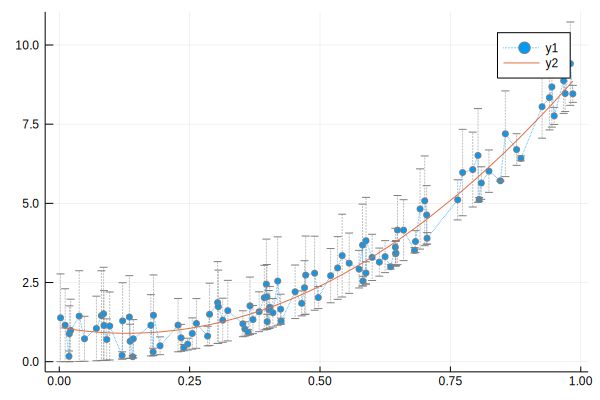

In [103]:
plot(x, y, yerr=ε, line=:dot, marker=:circle, ms=3, markerstrokecolor=:gray)
plot!(x, ỹ)

In [98]:
function time_f(sizes=[5, 5, 10, 50, 100, 200, 500, 1000, 1500, 2000])
    times = Float64[]
    for size in sizes
        x = sort(rand(size))
        ε = 0.1rand(size)
        y = 5.5x.^2 + ε;
        t = @benchmark Duck.leastsquares(x, y, order=2)
        push!(times, time(median(t)))
    end
    sizes[2:end], times[2:end]
end

time_f (generic function with 2 methods)

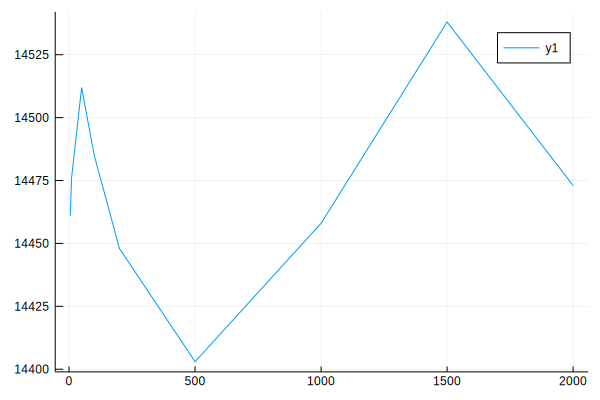

In [99]:
sizes, times = time_f()
plot(sizes, times)

In [89]:
using BenchmarkTools
using Statistics

In [86]:
t = @benchmark Duck.leastsquares(x, y, order=2)

BenchmarkTools.Trial: 
  memory estimate:  9.00 KiB
  allocs estimate:  12
  --------------
  minimum time:     13.870 μs (0.00% GC)
  median time:      14.575 μs (0.00% GC)
  mean time:        39.244 μs (2.73% GC)
  maximum time:     39.448 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

#### Julia StatsKits

In [104]:
using StatsKit

┌ Info: Precompiling StatsKit [2cb19f9e-ec4d-5c53-8573-a4542a68d3f0]
└ @ Base loading.jl:1242


In [131]:
df = DataFrame(X=x, Y=y, X²=x.^2, X³=x.^3)

,X,Y,X²,X³
,Float64,Float64,Float64,Float64
1,0.00245461,1.38597,6.0251e-6,1.47892e-8
2,0.0112817,1.15199,0.000127277,1.43589e-6
3,0.0186413,0.169815,0.000347499,6.47784e-6
4,0.0193367,0.88243,0.000373908,7.23014e-6
5,0.0218058,0.98817,0.000475491,1.03684e-5
6,0.0382232,1.43997,0.00146102,5.58448e-5
7,0.0484278,0.72349,0.00234525,0.000113575
8,0.071227,1.04867,0.00507328,0.000361354
9,0.0808665,1.45366,0.00653939,0.000528817


In [156]:
ols = lm(@formula(Y ~ X), df)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Y ~ +X

Coefficients:
─────────────────────────────────────────
   Estimate  Std.Error  t value  Pr(>|t|)
─────────────────────────────────────────
X   6.73177   0.184298  36.5265    <1e-58
─────────────────────────────────────────

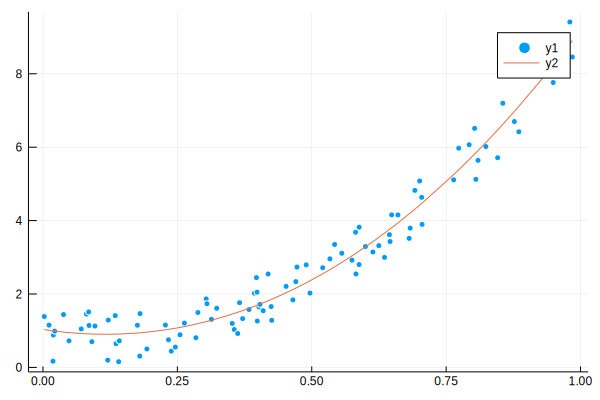

In [133]:
plot(x, y, line=false, marker=:circle, ms=3, markerstrokecolor=:white)
plot!(x, MultivariateStats.predict(ols, df))

In [144]:
square(x) = x.^2

square (generic function with 1 method)

In [147]:
@macroexpand @formula(Y ~ X + square(X))

:(StatsModels.Formula($(Expr(:copyast, :($(QuoteNode(:(Y ~ X + square(X))))))), $(Expr(:copyast, :($(QuoteNode(:(Y ~ X + square(X))))))), :Y, $(Expr(:copyast, :($(QuoteNode(:(X + square(X)))))))))